# Explore here

In [64]:
# Your code here
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

housing_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [65]:
housing_data = housing_data.drop(["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"], axis=1)
housing_data.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [66]:
X_train, X_test = train_test_split(housing_data, test_size=0.2, random_state=42)
X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [67]:
X_test.head()

,MedInc,Latitude,Longitude
20046,1.6812,36.06,-119.01
3024,2.5313,35.14,-119.46
15663,3.4801,37.80,-122.44
20484,5.7376,34.28,-118.72
9814,3.7250,36.62,-121.93


In [68]:
model = KMeans(n_clusters=6, random_state=42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [69]:
y_train = list(model.labels_)
X_train["cluster"] = y_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     16512 non-null  float64
 1   Latitude   16512 non-null  float64
 2   Longitude  16512 non-null  float64
 3   cluster    16512 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 580.5 KB


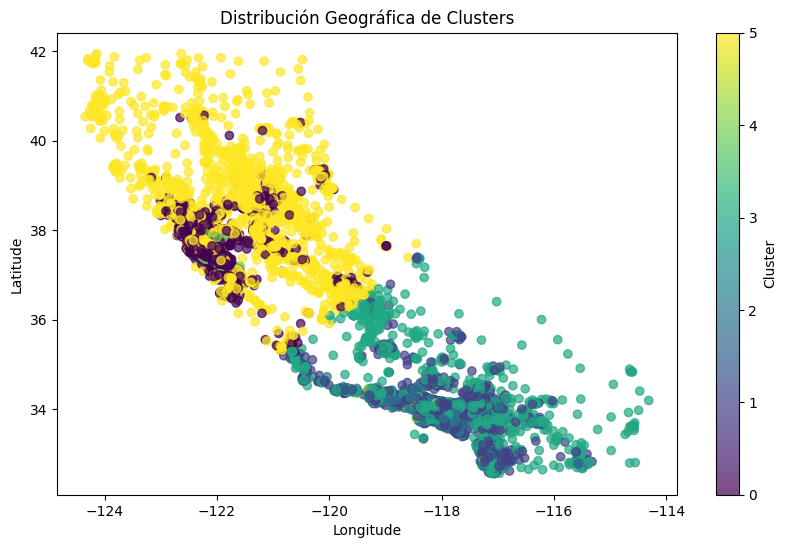

In [70]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X_train['Longitude'], X_train['Latitude'], 
    c=X_train['cluster'], cmap='viridis', alpha=0.7
)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribución Geográfica de Clusters')
plt.show()


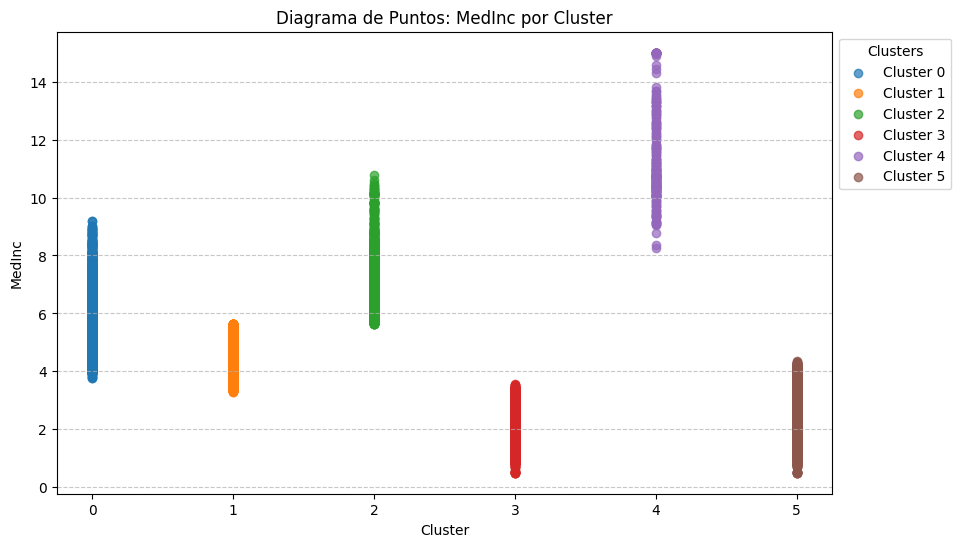

In [71]:
plt.figure(figsize=(10, 6))
for cluster_id in sorted(X_train["cluster"].unique()):
    cluster_data = X_train[X_train["cluster"] == cluster_id]
    plt.scatter([cluster_id] * len(cluster_data), cluster_data["MedInc"], label=f'Cluster {cluster_id}', alpha=0.7)

plt.title('Diagrama de Puntos: MedInc por Cluster')
plt.xlabel('Cluster')
plt.ylabel('MedInc')
plt.xticks(sorted(X_train["cluster"].unique()))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Clusters', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [72]:
y_test = list(model.predict(X_test))

In [73]:
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


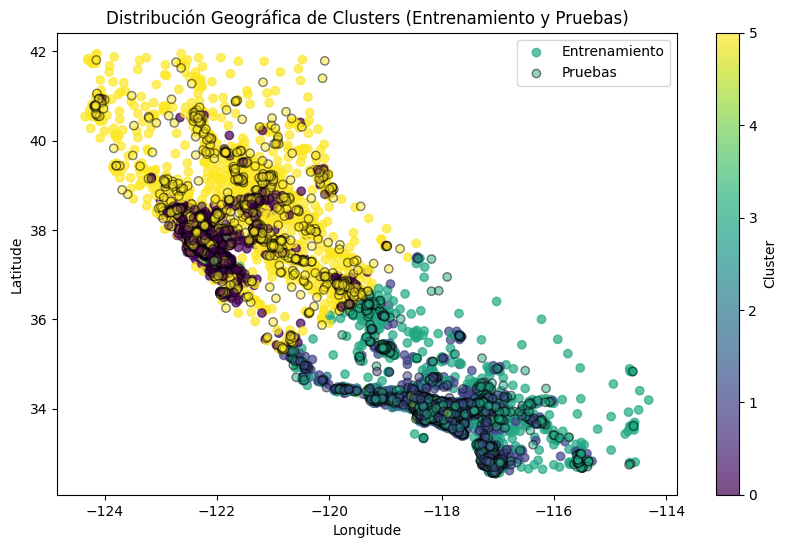

In [74]:
plt.figure(figsize=(10, 6))

scatter_train = plt.scatter(
    X_train['Longitude'], X_train['Latitude'], 
    c=X_train['cluster'], cmap='viridis', alpha=0.7, label='Entrenamiento'
)

scatter_test = plt.scatter(
    X_test['Longitude'], X_test['Latitude'], 
    c=X_test['cluster'], cmap='viridis', alpha=0.5, edgecolor='k', label='Pruebas'
)

plt.colorbar(scatter_train, label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribución Geográfica de Clusters (Entrenamiento y Pruebas)')
plt.legend(loc='upper right')
plt.show()


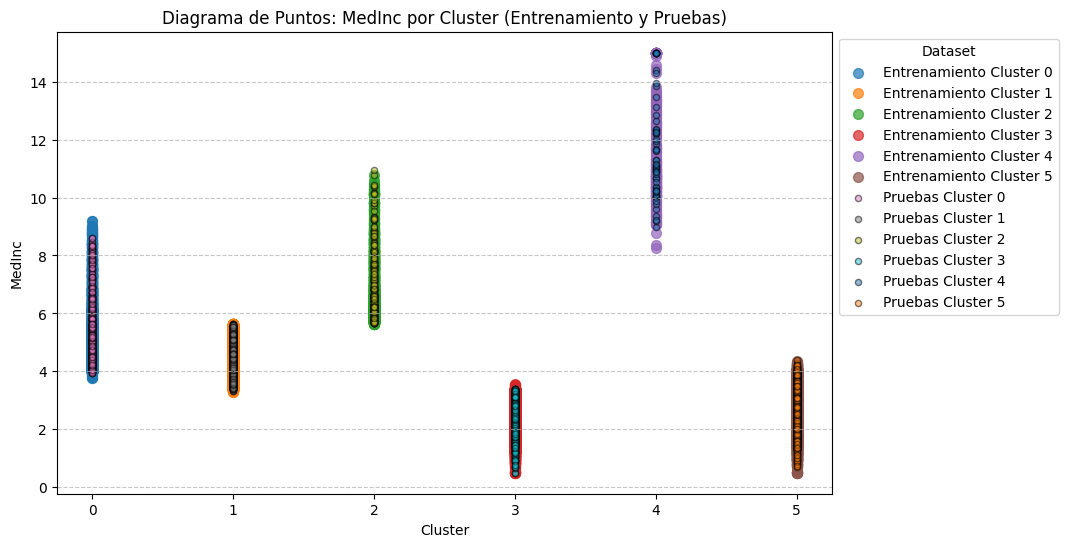

In [75]:
plt.figure(figsize=(10, 6))

for cluster_id in sorted(X_train["cluster"].unique()):
    cluster_data_train = X_train[X_train["cluster"] == cluster_id]
    plt.scatter([cluster_id] * len(cluster_data_train), cluster_data_train["MedInc"], 
                label=f'Entrenamiento Cluster {cluster_id}', alpha=0.7, s=50)

for cluster_id in sorted(X_test["cluster"].unique()):
    cluster_data_test = X_test[X_test["cluster"] == cluster_id]
    plt.scatter([cluster_id] * len(cluster_data_test), cluster_data_test["MedInc"], 
                alpha=0.5, edgecolor='k', s=20, label=f'Pruebas Cluster {cluster_id}')

plt.title('Diagrama de Puntos: MedInc por Cluster (Entrenamiento y Pruebas)')
plt.xlabel('Cluster')
plt.ylabel('MedInc')
plt.xticks(sorted(X_train["cluster"].unique()))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Dataset', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [76]:
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
y_pred = model2.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], shape=(4128,), dtype=int32)

In [78]:
accuracy_score(y_test, y_pred)

1.0